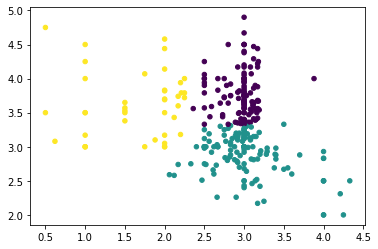

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

tags = pd.read_csv('Desktop/tags.csv')
tags = tags.dropna()
ratings = pd.read_csv('Desktop/ratings.csv')
ratings = ratings.dropna()

def genre_ratings(ratings, tags, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = tags[tags['tag'].str.contains(genre) ]
        tot = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, tot], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
genre_rating = genre_ratings(ratings, tags, ['horror', 'fantasy'], ['horror_ratings', 'comedy_ratings'])

X = biased_dataset[['horror_ratings','comedy_ratings']].values
kmeans_1 = KMeans(n_clusters=3)
predictions = kmeans_1.fit_predict(biased_dataset[['horror_ratings','comedy_ratings']].values)

clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['horror_ratings'], clustered['comedy_ratings'], c=clustered['group'], s=20)

#Formulate one or two ideas on how the combination of ratings and tags by users helps the data set to establish additional value using exploratory data analysis
#Ideas:
#1. combining ratings and tags means analyzing the rating associated with a genre or genres. My first idea is to 
#implement a graph that clusters all the ratings comparitive to the genre it is part of -- but this is a lot of data
#to pparse

#2. Narrow it down to 2 genres, and compare the ratings of each with one another 

#Document your process and results

#Process:
# After loading in the data sets, the goal is to find each rating associated with the genre of choosing, I decided to 
# chooose horror and comedy because those are my favorites
#using the KMeans cluster with 3 clusters to plot the graph with the resulting classifications 

#Results: 
#the yellow corresponds to high rankings of horror movies, where the purple correpsonds to comedies and the blue is
# a mix of Comedy and Horror movies that would appeal to either party

